<a href="https://colab.research.google.com/github/khbae/data-analytics-process/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D_%ED%94%84%EB%A1%9C%EC%84%B8%EC%8A%A4%EC%9D%98_%EC%9D%B4%ED%95%B4%EC%99%80_%EB%A6%AC%EB%8D%94%EC%9D%98_%EC%97%AD%ED%95%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 분석 프로세스의 이해와 리더의 역할

## [배경훈 (성균관대학교)](https://biz.skku.edu/bizskk/intro/faculty.do?mode=view&perId=LZStrK4YQ4gQgZgFgggGTAUQIwAYBSBHAngFhhgFliAjAcwF4qg%20&srProfessorType=20)



# Big Data(or Large Data)

![](https://github.com/data-science-lab/predicting-oil-prices/blob/main/03_Result/data2.png?raw=true)

# 데이터 분석 프로세스

![](https://github.com/data-science-lab/predicting-oil-prices/blob/main/03_Result/process3.png?raw=true)

![](https://github.com/data-science-lab/predicting-oil-prices/blob/main/03_Result/process4.png?raw=true)

# 데이터 분석 실습 - 오일 가격 예측 모델

## Input, Output 데이터를 활용해서 unknown인 함수 f 를 찾는 과정

![](https://github.com/data-science-lab/predicting-oil-prices/blob/main/03_Result/function2.png?raw=true)

* 선형함수: Small Data, Low-Performance Computing

* 비선형함수: Large Data, High-Performance Computing

# 훈련(Training)과 검증(Testing)

![](https://github.com/data-science-lab/predicting-oil-prices/blob/main/03_Result/training_test.png?raw=true)

# 선형 회귀 (Linear Regression)

\begin{gather*}  y_{i} = \beta_{i}x_{i1} + \cdots + \beta_{p}x_{ip} + \epsilon_{i} = x_{i}^T\beta + \epsilon_{i} , \hspace{2cm} i = 1, ..., n  \end{gather*}

![](https://github.com/data-science-lab/predicting-oil-prices/blob/main/03_Result/regression.png?raw=true)


* [Simple Regression 예시](https://gallery.shinyapps.io/simple_regression/)

# 데이터와 작업 환경 세팅

## 라이브러리 설치

In [ ]:
!pip3 install numpy
!pip3 install pandas
!pip3 install matplotlib
!pip3 install sklearn
!pip3 install tensorflow

## 필요한 라이브러리를 불러오기(Import)

In [ ]:
# 데이터 전처리에 사용하는 라이브러리
import numpy as np
import pandas as pd

# 데이터를 시각적으로 표현하는데 사용하는 라이브러리
import matplotlib.pyplot as plt

# 리스트에 있는 값들의 조합을 구하기위해 사용하는 라이브러리
from itertools import combinations

# 선형회귀분석에 사용하는 머신러닝 라이브러리
from sklearn.linear_model import LinearRegression

# 서포트 벡터 머신에 사용되는 머신러닝 라이브러리
from sklearn import svm

# 결정 트리 모형에 사용되는 머신러닝 라이브러리
from sklearn.tree import DecisionTreeRegressor

# 뉴럴 네트워크에 사용되는 라이브러리
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv1D, MaxPooling1D

## Dataset 

* Crude Oil Brent 가격 : 1988년 3월 4일	 ~ 2019년 12월 31일
* 3개월 Treasury Bill: Secondary Market Rate : 1988년 3월 4일	 ~ 2019년 12월 31일
* USD/JPY 현물 가격 : 1988년 3월 4일	 ~ 2019년 12월 31일
* 미국 달러 지수 : 1988년 3월 4일	 ~ 2019년 12월 31일

In [ ]:
# 깃허브에서 저장되어있는 데이터 불러오기
url = 'https://raw.githubusercontent.com/khbae/data-analytics-process/main/Data/data.csv'
dataset = pd.read_csv(url, index_col="Date", parse_dates=["Date"])
dataset.head()

,Oil_price,DTB3,USDJPY,DXY
Date,,,,
1988-03-04,14.00,0.0571,128.58,90.56
1988-03-07,13.90,0.0572,127.76,89.77
1988-03-08,13.80,0.0574,127.80,89.35
1988-03-09,13.98,0.0573,128.12,89.32
1988-03-10,14.48,0.0575,127.88,89.38


In [ ]:
## 로그 수익률 계산
log_return = np.log(dataset['Oil_price'])
log_return = log_return.diff(1)
dataset['Oil_log_return'] = log_return
dataset = dataset[["Oil_price", "Oil_log_return", "DTB3", "USDJPY", "DXY"]]  ## 열의 순서를 재배치
dataset.head()

,Oil_price,Oil_log_return,DTB3,USDJPY,DXY
Date,,,,,
1988-03-04,14.00,NaN,0.0571,128.58,90.56
1988-03-07,13.90,-0.007168,0.0572,127.76,89.77
1988-03-08,13.80,-0.007220,0.0574,127.80,89.35
1988-03-09,13.98,0.012959,0.0573,128.12,89.32
1988-03-10,14.48,0.035141,0.0575,127.88,89.38


## 시각화 : 데이터 플롯팅(Plotting)

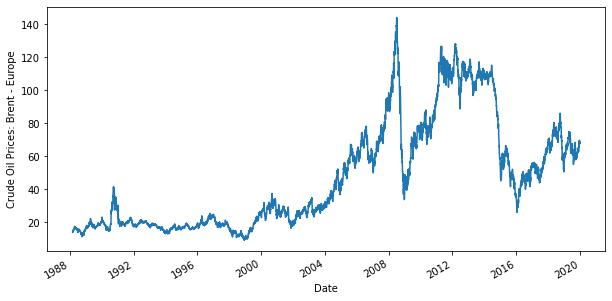

In [ ]:
# Y축 이름 설정
plt.ylabel("Crude Oil Prices: Brent - Europe")

# 그래프 사이즈 설정
dataset.Oil_price.plot(figsize=(10,5))

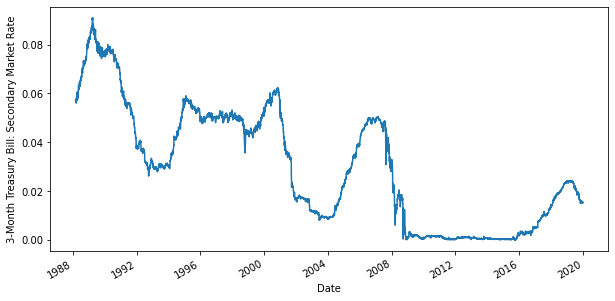

In [ ]:
# Y축 이름 설정
plt.ylabel("3-Month Treasury Bill: Secondary Market Rate")

# 그래프 사이즈 설정
dataset.DTB3.plot(figsize=(10,5))

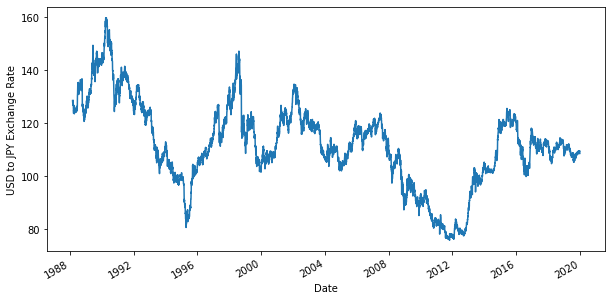

In [ ]:
# Y축 이름 설정
plt.ylabel("USD to JPY Exchange Rate")

# 그래프 사이즈 설정
dataset.USDJPY.plot(figsize=(10,5))

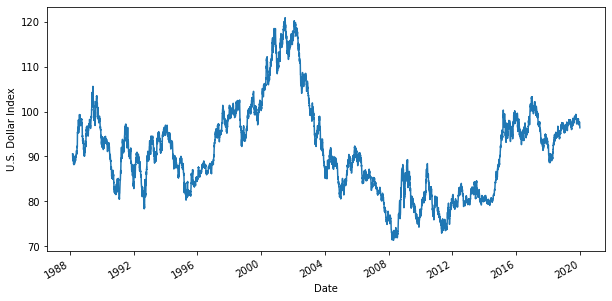

In [ ]:
# Y축 이름 설정
plt.ylabel("U.S. Dollar Index")

# 그래프 사이즈 설정
dataset.DXY.plot(figsize=(10,5))

## 설명변수 정의 — 오일 가격을 예측하는데 사용하는 특징들(the features) 

* 오일 가격의 과거 1일 ~ 10일의 이동평균
* 3개월 Treasury Bill rate의 과거 1일 ~ 10일의 이동평균  
* 독립변수 23개 간의 곱

In [ ]:
# 설명변수 만들기

# 오일 가격의 과거 1일 ~ 10일 이동평균
dataset['Oil_MA1'] = dataset['Oil_price'].shift(1).rolling(window=1).mean()
dataset['Oil_MA2'] = dataset['Oil_price'].shift(1).rolling(window=2).mean()
dataset['Oil_MA3'] = dataset['Oil_price'].shift(1).rolling(window=3).mean()
dataset['Oil_MA4'] = dataset['Oil_price'].shift(1).rolling(window=4).mean()
dataset['Oil_MA5'] = dataset['Oil_price'].shift(1).rolling(window=5).mean()
dataset['Oil_MA6'] = dataset['Oil_price'].shift(1).rolling(window=6).mean()
dataset['Oil_MA7'] = dataset['Oil_price'].shift(1).rolling(window=7).mean()
dataset['Oil_MA8'] = dataset['Oil_price'].shift(1).rolling(window=8).mean()
dataset['Oil_MA9'] = dataset['Oil_price'].shift(1).rolling(window=9).mean()
dataset['Oil_MA10'] = dataset['Oil_price'].shift(1).rolling(window=10).mean()

# 3개월 Treasury Bill rate의 과거 1일 ~ 10일 이동평균
dataset['DTB3_MA1'] = dataset['DTB3'].shift(1).rolling(window=1).mean()
dataset['DTB3_MA2'] = dataset['DTB3'].shift(1).rolling(window=2).mean()
dataset['DTB3_MA3'] = dataset['DTB3'].shift(1).rolling(window=3).mean()
dataset['DTB3_MA4'] = dataset['DTB3'].shift(1).rolling(window=4).mean()
dataset['DTB3_MA5'] = dataset['DTB3'].shift(1).rolling(window=5).mean()
dataset['DTB3_MA6'] = dataset['DTB3'].shift(1).rolling(window=6).mean()
dataset['DTB3_MA7'] = dataset['DTB3'].shift(1).rolling(window=7).mean()
dataset['DTB3_MA8'] = dataset['DTB3'].shift(1).rolling(window=8).mean()
dataset['DTB3_MA9'] = dataset['DTB3'].shift(1).rolling(window=9).mean()
dataset['DTB3_MA10'] = dataset['DTB3'].shift(1).rolling(window=10).mean()

In [ ]:
dataset.columns

Index(['Oil_price', 'Oil_log_return', 'DTB3', 'USDJPY', 'DXY', 'Oil_MA1',
       'Oil_MA2', 'Oil_MA3', 'Oil_MA4', 'Oil_MA5', 'Oil_MA6', 'Oil_MA7',
       'Oil_MA8', 'Oil_MA9', 'Oil_MA10', 'DTB3_MA1', 'DTB3_MA2', 'DTB3_MA3',
       'DTB3_MA4', 'DTB3_MA5', 'DTB3_MA6', 'DTB3_MA7', 'DTB3_MA8', 'DTB3_MA9',
       'DTB3_MA10'],
      dtype='object')

In [ ]:
# 독립변수들 간의 곱
for variable in list(combinations(dataset.columns[2:], 2)):
  new_variable_name = variable[0]+ "_" + variable[1]
  dataset[new_variable_name] = dataset[variable[0]] * dataset[variable[1]]

In [ ]:
dataset.head()

,Oil_price,Oil_log_return,DTB3,USDJPY,DXY,Oil_MA1,Oil_MA2,Oil_MA3,Oil_MA4,Oil_MA5,Oil_MA6,Oil_MA7,Oil_MA8,Oil_MA9,Oil_MA10,DTB3_MA1,DTB3_MA2,DTB3_MA3,DTB3_MA4,DTB3_MA5,DTB3_MA6,DTB3_MA7,DTB3_MA8,DTB3_MA9,DTB3_MA10,DTB3_USDJPY,DTB3_DXY,DTB3_Oil_MA1,DTB3_Oil_MA2,DTB3_Oil_MA3,DTB3_Oil_MA4,DTB3_Oil_MA5,DTB3_Oil_MA6,DTB3_Oil_MA7,DTB3_Oil_MA8,DTB3_Oil_MA9,DTB3_Oil_MA10,DTB3_DTB3_MA1,DTB3_DTB3_MA2,DTB3_DTB3_MA3,...,DTB3_MA1_DTB3_MA7,DTB3_MA1_DTB3_MA8,DTB3_MA1_DTB3_MA9,DTB3_MA1_DTB3_MA10,DTB3_MA2_DTB3_MA3,DTB3_MA2_DTB3_MA4,DTB3_MA2_DTB3_MA5,DTB3_MA2_DTB3_MA6,DTB3_MA2_DTB3_MA7,DTB3_MA2_DTB3_MA8,DTB3_MA2_DTB3_MA9,DTB3_MA2_DTB3_MA10,DTB3_MA3_DTB3_MA4,DTB3_MA3_DTB3_MA5,DTB3_MA3_DTB3_MA6,DTB3_MA3_DTB3_MA7,DTB3_MA3_DTB3_MA8,DTB3_MA3_DTB3_MA9,DTB3_MA3_DTB3_MA10,DTB3_MA4_DTB3_MA5,DTB3_MA4_DTB3_MA6,DTB3_MA4_DTB3_MA7,DTB3_MA4_DTB3_MA8,DTB3_MA4_DTB3_MA9,DTB3_MA4_DTB3_MA10,DTB3_MA5_DTB3_MA6,DTB3_MA5_DTB3_MA7,DTB3_MA5_DTB3_MA8,DTB3_MA5_DTB3_MA9,DTB3_MA5_DTB3_MA10,DTB3_MA6_DTB3_MA7,DTB3_MA6_DTB3_MA8,DTB3_MA6_DTB3_MA9,DTB3_MA6_DTB3_MA10,DTB3_MA7_DTB3_MA8,DTB3_MA7_DTB3_MA9,DTB3_MA7_DTB3_MA10,DTB3_MA8_DTB3_MA9,DTB3_MA8_DTB3_MA10,DTB3_MA9_DTB3_MA10
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1988-03-04,14.00,NaN,0.0571,128.58,90.56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.341918,5.170976,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988-03-07,13.90,-0.007168,0.0572,127.76,89.77,14.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.307872,5.134844,0.80080,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003266,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988-03-08,13.80,-0.007220,0.0574,127.80,89.35,13.90,13.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0572,0.05715,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.335720,5.128690,0.79786,0.800730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003283,0.003280,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988-03-09,13.98,0.012959,0.0573,128.12,89.32,13.80,13.85,13.900000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0574,0.05730,0.057233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.341276,5.118036,0.79074,0.793605,0.796470,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003289,0.003283,0.003279,...,NaN,NaN,NaN,NaN,0.003279,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988-03-10,14.48,0.035141,0.0575,127.88,89.38,13.98,13.89,13.893333,13.92,NaN,NaN,NaN,NaN,NaN,NaN,0.0573,0.05735,0.057300,0.05725,NaN,NaN,NaN,NaN,NaN,NaN,7.353100,5.139350,0.80385,0.798675,0.798867,0.8004,NaN,NaN,NaN,NaN,NaN,NaN,0.003295,0.003298,0.003295,...,NaN,NaN,NaN,NaN,0.003286,0.003283,NaN,NaN,NaN,NaN,NaN,NaN,0.00328,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# NaN 값을 제거
dataset = dataset.dropna()
dataset.head()

,Oil_price,Oil_log_return,DTB3,USDJPY,DXY,Oil_MA1,Oil_MA2,Oil_MA3,Oil_MA4,Oil_MA5,Oil_MA6,Oil_MA7,Oil_MA8,Oil_MA9,Oil_MA10,DTB3_MA1,DTB3_MA2,DTB3_MA3,DTB3_MA4,DTB3_MA5,DTB3_MA6,DTB3_MA7,DTB3_MA8,DTB3_MA9,DTB3_MA10,DTB3_USDJPY,DTB3_DXY,DTB3_Oil_MA1,DTB3_Oil_MA2,DTB3_Oil_MA3,DTB3_Oil_MA4,DTB3_Oil_MA5,DTB3_Oil_MA6,DTB3_Oil_MA7,DTB3_Oil_MA8,DTB3_Oil_MA9,DTB3_Oil_MA10,DTB3_DTB3_MA1,DTB3_DTB3_MA2,DTB3_DTB3_MA3,...,DTB3_MA1_DTB3_MA7,DTB3_MA1_DTB3_MA8,DTB3_MA1_DTB3_MA9,DTB3_MA1_DTB3_MA10,DTB3_MA2_DTB3_MA3,DTB3_MA2_DTB3_MA4,DTB3_MA2_DTB3_MA5,DTB3_MA2_DTB3_MA6,DTB3_MA2_DTB3_MA7,DTB3_MA2_DTB3_MA8,DTB3_MA2_DTB3_MA9,DTB3_MA2_DTB3_MA10,DTB3_MA3_DTB3_MA4,DTB3_MA3_DTB3_MA5,DTB3_MA3_DTB3_MA6,DTB3_MA3_DTB3_MA7,DTB3_MA3_DTB3_MA8,DTB3_MA3_DTB3_MA9,DTB3_MA3_DTB3_MA10,DTB3_MA4_DTB3_MA5,DTB3_MA4_DTB3_MA6,DTB3_MA4_DTB3_MA7,DTB3_MA4_DTB3_MA8,DTB3_MA4_DTB3_MA9,DTB3_MA4_DTB3_MA10,DTB3_MA5_DTB3_MA6,DTB3_MA5_DTB3_MA7,DTB3_MA5_DTB3_MA8,DTB3_MA5_DTB3_MA9,DTB3_MA5_DTB3_MA10,DTB3_MA6_DTB3_MA7,DTB3_MA6_DTB3_MA8,DTB3_MA6_DTB3_MA9,DTB3_MA6_DTB3_MA10,DTB3_MA7_DTB3_MA8,DTB3_MA7_DTB3_MA9,DTB3_MA7_DTB3_MA10,DTB3_MA8_DTB3_MA9,DTB3_MA8_DTB3_MA10,DTB3_MA9_DTB3_MA10
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1988-03-18,14.93,0.034063,0.0566,127.88,90.51,14.43,14.440,14.393333,14.3650,14.468,14.470000,14.400000,14.32500,14.277778,14.250,0.0560,0.05605,0.056067,0.056300,0.05650,0.056667,0.056757,0.056837,0.056878,0.05690,7.238008,5.122866,0.816738,0.817304,0.814663,0.813059,0.818889,0.819002,0.815040,0.810795,0.808122,0.806550,0.003170,0.003172,0.003173,...,0.003178,0.003183,0.003185,0.003186,0.003143,0.003156,0.003167,0.003176,0.003181,0.003186,0.003188,0.003189,0.003157,0.003168,0.003177,0.003182,0.003187,0.003189,0.003190,0.003181,0.003190,0.003195,0.003200,0.003202,0.003203,0.003202,0.003207,0.003211,0.003214,0.003215,0.003216,0.003221,0.003223,0.003224,0.003226,0.003228,0.003229,0.003233,0.003234,0.003236
1988-03-21,15.38,0.029695,0.0574,126.92,90.10,14.93,14.680,14.603333,14.5275,14.478,14.545000,14.535714,14.46625,14.392222,14.343,0.0566,0.05630,0.056233,0.056200,0.05636,0.056517,0.056657,0.056737,0.056811,0.05685,7.285208,5.171740,0.856982,0.842632,0.838231,0.833878,0.831037,0.834883,0.834350,0.830363,0.826114,0.823288,0.003249,0.003232,0.003228,...,0.003207,0.003211,0.003216,0.003218,0.003166,0.003164,0.003173,0.003182,0.003190,0.003194,0.003198,0.003201,0.003160,0.003169,0.003178,0.003186,0.003191,0.003195,0.003197,0.003167,0.003176,0.003184,0.003189,0.003193,0.003195,0.003185,0.003193,0.003198,0.003202,0.003204,0.003202,0.003207,0.003211,0.003213,0.003215,0.003219,0.003221,0.003223,0.003226,0.003230
1988-03-22,15.03,-0.023020,0.0578,126.97,90.20,15.38,15.155,14.913333,14.7975,14.698,14.628333,14.664286,14.64125,14.567778,14.491,0.0574,0.05700,0.056667,0.056525,0.05644,0.056533,0.056643,0.056750,0.056811,0.05687,7.338866,5.213560,0.888964,0.875959,0.861991,0.855295,0.849544,0.845518,0.847596,0.846264,0.842018,0.837580,0.003318,0.003295,0.003275,...,0.003251,0.003257,0.003261,0.003264,0.003230,0.003222,0.003217,0.003222,0.003229,0.003235,0.003238,0.003242,0.003203,0.003198,0.003204,0.003210,0.003216,0.003219,0.003223,0.003190,0.003196,0.003202,0.003208,0.003211,0.003215,0.003191,0.003197,0.003203,0.003206,0.003210,0.003202,0.003208,0.003212,0.003215,0.003214,0.003218,0.003221,0.003224,0.003227,0.003231
1988-03-23,15.40,0.024319,0.0583,126.73,90.07,15.03,15.205,15.113333,14.9425,14.844,14.753333,14.685714,14.71000,14.684444,14.614,0.0578,0.05760,0.057267,0.056950,0.05678,0.056667,0.056714,0.056787,0.056867,0.05691,7.388359,5.251081,0.876249,0.886452,0.881107,0.871148,0.865405,0.860119,0.856177,0.857593,0.856103,0.851996,0.003370,0.003358,0.003339,...,0.003278,0.003282,0.003287,0.003289,0.003299,0.003280,0.003271,0.003264,0.003267,0.003271,0.003276,0.003278,0.003261,0.003252,0.003245,0.003248,0.003252,0.003257,0.003259,0.003234,0.003227,0.003230,0.003234,0.003239,0.003241,0.003218,0.003220,0.003224,0.003229,0.003231,0.0032

In [ ]:
# 샘플 데이터의 시작일과 종료일을 선택
start_date = "1987-06-03" 
end_date = "2019-12-31"

data = dataset.loc[start_date:end_date,:].copy()
data.head()

,Oil_price,Oil_log_return,DTB3,USDJPY,DXY,Oil_MA1,Oil_MA2,Oil_MA3,Oil_MA4,Oil_MA5,Oil_MA6,Oil_MA7,Oil_MA8,Oil_MA9,Oil_MA10,DTB3_MA1,DTB3_MA2,DTB3_MA3,DTB3_MA4,DTB3_MA5,DTB3_MA6,DTB3_MA7,DTB3_MA8,DTB3_MA9,DTB3_MA10,DTB3_USDJPY,DTB3_DXY,DTB3_Oil_MA1,DTB3_Oil_MA2,DTB3_Oil_MA3,DTB3_Oil_MA4,DTB3_Oil_MA5,DTB3_Oil_MA6,DTB3_Oil_MA7,DTB3_Oil_MA8,DTB3_Oil_MA9,DTB3_Oil_MA10,DTB3_DTB3_MA1,DTB3_DTB3_MA2,DTB3_DTB3_MA3,...,DTB3_MA1_DTB3_MA7,DTB3_MA1_DTB3_MA8,DTB3_MA1_DTB3_MA9,DTB3_MA1_DTB3_MA10,DTB3_MA2_DTB3_MA3,DTB3_MA2_DTB3_MA4,DTB3_MA2_DTB3_MA5,DTB3_MA2_DTB3_MA6,DTB3_MA2_DTB3_MA7,DTB3_MA2_DTB3_MA8,DTB3_MA2_DTB3_MA9,DTB3_MA2_DTB3_MA10,DTB3_MA3_DTB3_MA4,DTB3_MA3_DTB3_MA5,DTB3_MA3_DTB3_MA6,DTB3_MA3_DTB3_MA7,DTB3_MA3_DTB3_MA8,DTB3_MA3_DTB3_MA9,DTB3_MA3_DTB3_MA10,DTB3_MA4_DTB3_MA5,DTB3_MA4_DTB3_MA6,DTB3_MA4_DTB3_MA7,DTB3_MA4_DTB3_MA8,DTB3_MA4_DTB3_MA9,DTB3_MA4_DTB3_MA10,DTB3_MA5_DTB3_MA6,DTB3_MA5_DTB3_MA7,DTB3_MA5_DTB3_MA8,DTB3_MA5_DTB3_MA9,DTB3_MA5_DTB3_MA10,DTB3_MA6_DTB3_MA7,DTB3_MA6_DTB3_MA8,DTB3_MA6_DTB3_MA9,DTB3_MA6_DTB3_MA10,DTB3_MA7_DTB3_MA8,DTB3_MA7_DTB3_MA9,DTB3_MA7_DTB3_MA10,DTB3_MA8_DTB3_MA9,DTB3_MA8_DTB3_MA10,DTB3_MA9_DTB3_MA10
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1988-03-18,14.93,0.034063,0.0566,127.88,90.51,14.43,14.440,14.393333,14.3650,14.468,14.470000,14.400000,14.32500,14.277778,14.250,0.0560,0.05605,0.056067,0.056300,0.05650,0.056667,0.056757,0.056837,0.056878,0.05690,7.238008,5.122866,0.816738,0.817304,0.814663,0.813059,0.818889,0.819002,0.815040,0.810795,0.808122,0.806550,0.003170,0.003172,0.003173,...,0.003178,0.003183,0.003185,0.003186,0.003143,0.003156,0.003167,0.003176,0.003181,0.003186,0.003188,0.003189,0.003157,0.003168,0.003177,0.003182,0.003187,0.003189,0.003190,0.003181,0.003190,0.003195,0.003200,0.003202,0.003203,0.003202,0.003207,0.003211,0.003214,0.003215,0.003216,0.003221,0.003223,0.003224,0.003226,0.003228,0.003229,0.003233,0.003234,0.003236
1988-03-21,15.38,0.029695,0.0574,126.92,90.10,14.93,14.680,14.603333,14.5275,14.478,14.545000,14.535714,14.46625,14.392222,14.343,0.0566,0.05630,0.056233,0.056200,0.05636,0.056517,0.056657,0.056737,0.056811,0.05685,7.285208,5.171740,0.856982,0.842632,0.838231,0.833878,0.831037,0.834883,0.834350,0.830363,0.826114,0.823288,0.003249,0.003232,0.003228,...,0.003207,0.003211,0.003216,0.003218,0.003166,0.003164,0.003173,0.003182,0.003190,0.003194,0.003198,0.003201,0.003160,0.003169,0.003178,0.003186,0.003191,0.003195,0.003197,0.003167,0.003176,0.003184,0.003189,0.003193,0.003195,0.003185,0.003193,0.003198,0.003202,0.003204,0.003202,0.003207,0.003211,0.003213,0.003215,0.003219,0.003221,0.003223,0.003226,0.003230
1988-03-22,15.03,-0.023020,0.0578,126.97,90.20,15.38,15.155,14.913333,14.7975,14.698,14.628333,14.664286,14.64125,14.567778,14.491,0.0574,0.05700,0.056667,0.056525,0.05644,0.056533,0.056643,0.056750,0.056811,0.05687,7.338866,5.213560,0.888964,0.875959,0.861991,0.855295,0.849544,0.845518,0.847596,0.846264,0.842018,0.837580,0.003318,0.003295,0.003275,...,0.003251,0.003257,0.003261,0.003264,0.003230,0.003222,0.003217,0.003222,0.003229,0.003235,0.003238,0.003242,0.003203,0.003198,0.003204,0.003210,0.003216,0.003219,0.003223,0.003190,0.003196,0.003202,0.003208,0.003211,0.003215,0.003191,0.003197,0.003203,0.003206,0.003210,0.003202,0.003208,0.003212,0.003215,0.003214,0.003218,0.003221,0.003224,0.003227,0.003231
1988-03-23,15.40,0.024319,0.0583,126.73,90.07,15.03,15.205,15.113333,14.9425,14.844,14.753333,14.685714,14.71000,14.684444,14.614,0.0578,0.05760,0.057267,0.056950,0.05678,0.056667,0.056714,0.056787,0.056867,0.05691,7.388359,5.251081,0.876249,0.886452,0.881107,0.871148,0.865405,0.860119,0.856177,0.857593,0.856103,0.851996,0.003370,0.003358,0.003339,...,0.003278,0.003282,0.003287,0.003289,0.003299,0.003280,0.003271,0.003264,0.003267,0.003271,0.003276,0.003278,0.003261,0.003252,0.003245,0.003248,0.003252,0.003257,0.003259,0.003234,0.003227,0.003230,0.003234,0.003239,0.003241,0.003218,0.003220,0.003224,0.003229,0.003231,0.0032

# 실습 - feature 선택

In [ ]:
data.columns

Index(['Oil_price', 'Oil_log_return', 'DTB3', 'USDJPY', 'DXY', 'Oil_MA1',
       'Oil_MA2', 'Oil_MA3', 'Oil_MA4', 'Oil_MA5',
       ...
       'DTB3_MA6_DTB3_MA7', 'DTB3_MA6_DTB3_MA8', 'DTB3_MA6_DTB3_MA9',
       'DTB3_MA6_DTB3_MA10', 'DTB3_MA7_DTB3_MA8', 'DTB3_MA7_DTB3_MA9',
       'DTB3_MA7_DTB3_MA10', 'DTB3_MA8_DTB3_MA9', 'DTB3_MA8_DTB3_MA10',
       'DTB3_MA9_DTB3_MA10'],
      dtype='object', length=278)

In [ ]:
# 원하는 특징 변수를 선택
features = ["Oil_MA1", "Oil_MA5", "Oil_MA10", "DTB3_Oil_MA5"]

# 선택한 특징 변수를 X로 설정
X = data[features]

# 데이터의 시작부분을 확인
X.head()

,Oil_MA1,Oil_MA5,Oil_MA10,DTB3_Oil_MA5
Date,,,,
1988-03-18,14.43,14.468,14.250,0.818889
1988-03-21,14.93,14.478,14.343,0.831037
1988-03-22,15.38,14.698,14.491,0.849544
1988-03-23,15.03,14.844,14.614,0.865405
1988-03-24,15.40,15.034,14.756,0.870469


## 종속변수 정의



In [ ]:
# 원하는 종속 변수를 선택 
# "Oil_price"  : 오일의 가격
# "Oil_log_return"  : 오일의 로그 수익률
dep_var = "Oil_price"
y = data[dep_var] 

# 데이터의 시작부분을 확인
y.head()

Date
1988-03-18    14.93
1988-03-21    15.38
1988-03-22    15.03
1988-03-23    15.40
1988-03-24    15.65
Name: Oil_price, dtype: float64

## Training

### 데이터를 2가지 집단으로 나누기 
* 80% : training set
* 20% : testing set

In [ ]:
# 전체 데이터의 80%를 training set으로 설정
training = 0.8
t = int(training*len(data))

# Training dataset
X_train = X[:t]
y_train = y[:t]

# Testing dataset
X_test = X[t:]
y_test = y[t:]


![](https://github.com/data-science-lab/predicting-oil-prices/blob/main/03_Result/training_test.png?raw=true)

## 모형 선택

### 선형 회귀(Linear Regression)

In [ ]:
# 회귀 분석에 대한 계수 및 상수 생성
linear_model = LinearRegression().fit(X_train,y_train)

#### Predicted Value & Actual Value 비교

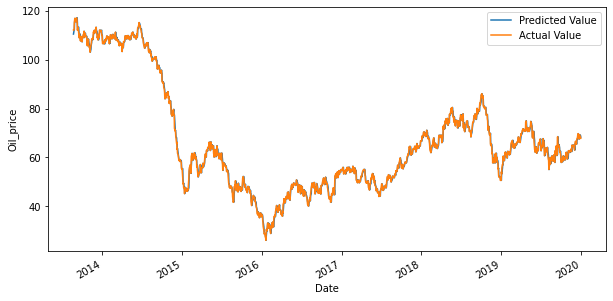

In [ ]:
predicted_value = linear_model.predict(X_test)
predicted_value = pd.DataFrame(predicted_value,index=y_test.index,columns = [dep_var])
predicted_value.plot(figsize=(10,5))
y_test.plot()
plt.legend(['Predicted Value','Actual Value'])
plt.ylabel(dep_var)
plt.show()

#### 모형 정확도(accuracy) 계산

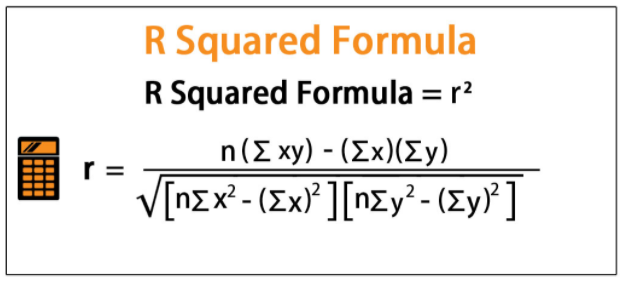

In [ ]:
## 1번 방법
x = np.array(predicted_value).reshape(1, len(predicted_value))[0]
Y = np.array(y_test)

n = len(x)
numerator = n*sum(x*Y) - sum(x)*sum(Y)
denominator = np.sqrt( (n*sum(x**2)-sum(x)**2) * (n*sum(Y**2)-sum(Y)**2) )
r_squared = (numerator/denominator)**2
r_squared

0.9971877069858308

In [ ]:
## 2번 방법
x = np.array(predicted_value).reshape(1, len(predicted_value))[0]
Y = np.array(y_test)
r = np.corrcoef(x, Y)[0,1]

R_squared_score = r**2

accuracy = ("{0:.2f}".format(R_squared_score*100))
print ("The model has a " + accuracy + "% accuracy.")

The model has a 99.72% accuracy.


### 서포트 벡터 머신(Support Vector Machine)

In [ ]:
svm_model = svm.SVR()
svm_model.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

#### Predicted Value & Actual Value 비교

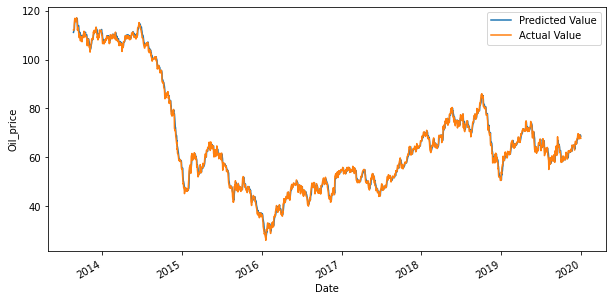

In [ ]:
predicted_value = svm_model.predict(X_test)
predicted_value = pd.DataFrame(predicted_value,index=y_test.index,columns = [dep_var])
predicted_value.plot(figsize=(10,5))
y_test.plot()
plt.legend(['Predicted Value','Actual Value'])
plt.ylabel(dep_var)
plt.show()

#### 모형 정확도(accuracy) 계산

In [ ]:
x = np.array(predicted_value).reshape(1, len(predicted_value))[0]
Y = np.array(y_test)
r = np.corrcoef(x, Y)[0,1]

R_squared_score = r**2

accuracy = ("{0:.2f}".format(R_squared_score*100))
print ("The model has a " + accuracy + "% accuracy.")

The model has a 99.68% accuracy.


### 결정 트리(Decision Tree Regression)

In [ ]:
# max_depth의 값이 커질수록 정확도 상승
N = 2
dtr_model = DecisionTreeRegressor(max_depth=N) 
dtr_model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

#### Predicted Value & Actual Value 비교

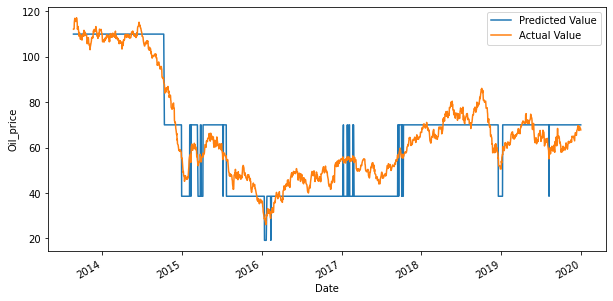

In [ ]:
predicted_value = dtr_model.predict(X_test)
predicted_value = pd.DataFrame(predicted_value,index=y_test.index,columns = [dep_var])
predicted_value.plot(figsize=(10,5))
y_test.plot()
plt.legend(['Predicted Value','Actual Value'])
plt.ylabel(dep_var)
plt.show()

#### 모형 정확도(accuracy) 계산

In [ ]:
x = np.array(predicted_value).reshape(1, len(predicted_value))[0]
Y = np.array(y_test)
r = np.corrcoef(x, Y)[0,1]

R_squared_score = r**2

accuracy = ("{0:.2f}".format(R_squared_score*100))
print ("The model has a " + accuracy + "% accuracy.")

The model has a 88.79% accuracy.


### Neural Network

In [ ]:
# 뉴럴 네트워크에 들어가도록 인풋 데이터를 변형해준다.
X_train_set = np.array(X_train).reshape((X_train.shape[0], X_train.shape[1], 1))
y_train_set = np.array(y_train)
X_test_set = np.array(X_test).reshape((X_test.shape[0], X_test.shape[1], 1))

In [ ]:
model = Sequential()
##model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(len(features), 1)))
##model.add(MaxPooling1D(pool_size=2))

model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')
history = model.fit(X_train_set,y_train_set, epochs=10, verbose = 2)
#model.summary()

Epoch 1/10
208/208 - 1s - loss: 709.0767
Epoch 2/10
208/208 - 0s - loss: 2.0629
Epoch 3/10
208/208 - 0s - loss: 2.0098
Epoch 4/10
208/208 - 0s - loss: 1.9633
Epoch 5/10
208/208 - 0s - loss: 1.9120
Epoch 6/10
208/208 - 0s - loss: 1.8038
Epoch 7/10
208/208 - 0s - loss: 1.6251
Epoch 8/10
208/208 - 0s - loss: 1.5380
Epoch 9/10
208/208 - 0s - loss: 1.5246
Epoch 10/10
208/208 - 0s - loss: 1.4654


#### Predicted Value & Actual Value 비교

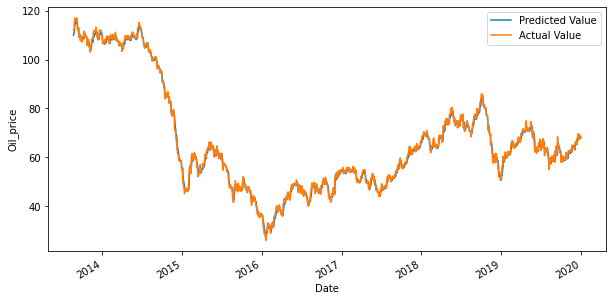

In [ ]:
predicted_value = model.predict(X_test_set,verbose=0)
predicted_value = pd.DataFrame(predicted_value,index=y_test.index,columns = [dep_var])
predicted_value.plot(figsize=(10,5))
y_test.plot()
plt.legend(['Predicted Value','Actual Value'])
plt.ylabel(dep_var)
plt.show()

#### 모형 정확도(accuracy) 계산

In [ ]:
x = np.array(predicted_value).reshape(1, len(predicted_value))[0]
Y = np.array(y_test)
r = np.corrcoef(x, Y)[0,1]

R_squared_score = r**2

accuracy = ("{0:.2f}".format(R_squared_score*100))
print ("The model has a " + accuracy + "% accuracy.")

The model has a 99.65% accuracy.


## 구글 서베이 링크에 R squared를 제출

* https://docs.google.com/forms/d/e/1FAIpQLScVL-vdflB_D7FnuItv0qxGpGQBtWC_JRsNbwPhwrKWEmFeiw/viewform?usp=sf_link

## 모델 개선

* Making our dataset larger : 데이터의 시작일이나 종료일을 변경
* 독립변수 변경
* 모형 변경

In [ ]:
# 샘플 데이터의 시작일과 종료일을 선택
start_date = "2000-01-01" 
end_date = "2019-12-31"

data = dataset.loc[start_date:end_date,:].copy()

# 원하는 특징 변수를 선택
features = ["Oil_MA1", "Oil_MA2", "Oil_MA3", "DTB3_Oil_MA1", "DTB3_Oil_MA2"]
# 선택한 특징 변수를 X로 설정  
X = data[features]

# 원하는 종속 변수를 선택 
# "Oil_price"   :   오일의 가격
# "Oil_log_return"   :   오일의 로그 수익률
y = data["Oil_log_return"] 

In [ ]:
# 전체 데이터의 80%를 training set으로 설정
training = 0.8
t = int(training*len(data))

# Training dataset
X_train = X[:t]
y_train = y[:t]

# Testing dataset
X_test = X[t:]
y_test = y[t:]

##### 선형 회귀(Linear Regression)

In [ ]:
# 회귀 분석에 대한 계수 및 상수 생성
linear_model = LinearRegression().fit(X_train,y_train)

predicted_value = linear_model.predict(X_test)

# 모형 정확도 계산
x = np.array(predicted_value).reshape(1, len(predicted_value))[0]
Y = np.array(y_test)
r = np.corrcoef(x, Y)[0,1]

R_squared_score = r**2

accuracy = ("{0:.4f}".format(R_squared_score*100))
print ("The model has a " + accuracy + "% accuracy.")

The model has a 0.0004% accuracy.


##### 서포트 벡터 머신(Support Vector Machine)

In [ ]:
# 서포트 벡터 머신
svm_model = svm.SVR()
svm_model.fit(X_train, y_train)

predicted_value = svm_model.predict(X_test)

# 모형 정확도 계산
x = np.array(predicted_value).reshape(1, len(predicted_value))[0]
Y = np.array(y_test)
r = np.corrcoef(x, Y)[0,1]

R_squared_score = r**2

accuracy = ("{0:.4f}".format(R_squared_score*100))
print ("The model has a " + accuracy + "% accuracy.")

The model has a 0.1964% accuracy.


##### 결정 트리 모형(Decision Tree Regression)

In [ ]:
# 결정 트리 모형
# max_depth의 값이 커질수록 정확도 상승
N = 10
dtr_model = DecisionTreeRegressor(max_depth=N) 
dtr_model.fit(X_train, y_train)

predicted_value = dtr_model.predict(X_test)

# 모형 정확도 계산
x = np.array(predicted_value).reshape(1, len(predicted_value))[0]
Y = np.array(y_test)
r = np.corrcoef(x, Y)[0,1]

R_squared_score = r**2

accuracy = ("{0:.4f}".format(R_squared_score*100))
print ("The model has a " + accuracy + "% accuracy.")

The model has a 0.0000% accuracy.


##### Neural Network

In [ ]:
# 뉴럴 네트워크에 들어가도록 인풋 데이터를 변형해준다.
X_train_set = np.array(X_train).reshape((X_train.shape[0], X_train.shape[1], 1))
y_train_set = np.array(y_train)
X_test_set = np.array(X_test).reshape((X_test.shape[0], X_test.shape[1], 1))

model = Sequential()
#model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(len(features), 1)))
#model.add(MaxPooling1D(pool_size=2))

model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')
history = model.fit(X_train_set,y_train_set, epochs=50, verbose=False)
predicted_value = model.predict(X_test_set,verbose=0)

# 모형 정확도 계산
x = np.array(predicted_value).reshape(1, len(predicted_value))[0]
Y = np.array(y_test)
r = np.corrcoef(x, Y)[0,1]

R_squared_score = r**2

accuracy = ("{0:.4f}".format(R_squared_score*100))
print ("The model has a " + accuracy + "% accuracy.")

The model has a 0.3095% accuracy.


## 구글 서베이 링크에 R squared를 제출

* https://docs.google.com/forms/d/e/1FAIpQLScVL-vdflB_D7FnuItv0qxGpGQBtWC_JRsNbwPhwrKWEmFeiw/viewform?usp=sf_link